# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [76]:
X = pd.get_dummies(data[['rate_marriage','educ','occupation','occupation_husb','religious']], columns = ['rate_marriage','educ','occupation','occupation_husb','religious'])

In [77]:
X.head()

,rate_marriage_1.0,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,educ_9.0,educ_12.0,educ_14.0,educ_16.0,educ_17.0,...,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [78]:
Y = data['affair']

In [79]:
model = LogisticRegression(solver='lbfgs')

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [81]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
for line in zip(predictions[:, 1], Y_test):
    print(line)

(0.6908595519487541, 0)
(0.08209216525334655, 0)
(0.30151162814705856, 0)
(0.14053542151495368, 0)
(0.33271318865431515, 1)
(0.10660701723494956, 0)
(0.24526742523001493, 0)
(0.2869770576530119, 0)
(0.6586465207021669, 1)
(0.19309992056761516, 0)
(0.11346760657168047, 0)
(0.1566214416118787, 0)
(0.11346760657168047, 0)
(0.4325185974363794, 0)
(0.7539475841992582, 1)
(0.4156609771480001, 0)
(0.2708937402170647, 0)
(0.6854542970260791, 1)
(0.23207115389250815, 0)
(0.13482262808305528, 0)
(0.21465181655080412, 1)
(0.4146688270619872, 1)
(0.12041841039277074, 1)
(0.4461648623336773, 1)
(0.26949223428532737, 0)
(0.13995375981001817, 0)
(0.4662414288875512, 0)
(0.26949223428532737, 0)
(0.36248000594862856, 0)
(0.08683943192165193, 0)
(0.18312543387900382, 0)
(0.36248000594862856, 1)
(0.22574176630606518, 0)
(0.6416094994640196, 1)
(0.5337842410217256, 1)
(0.5337842410217256, 1)
(0.18799901997987964, 0)
(0.20868331263896447, 0)
(0.23478496186886091, 1)
(0.18990741624818178, 0)
(0.545479467545

In [13]:
model.score(X_test, Y_test)

0.7146596858638743

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

0.7293193717277487

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

0.7109947643979058

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 8)
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

0.7109947643979058

### Оценка качества модели

Считаем accuracy последней модели

In [17]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [18]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7109947643979058

In [19]:
precision = tp / (tp + fp)
precision

0.5977337110481586

### Используем готовые библиотеки

In [26]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [27]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [28]:
# посмотрим что получилось
for line in zip(pr, re, thres):
    print( line )

(0.325130890052356, 1.0, 0.048658032881961015)
(0.3247773703509691, 0.998389694041868, 0.05829221238905328)
(0.3249475890985325, 0.998389694041868, 0.05830747635582576)
(0.3251179863660199, 0.998389694041868, 0.06034681590960384)
(0.3252885624344176, 0.998389694041868, 0.06642278289482492)
(0.32545931758530183, 0.998389694041868, 0.07086985351055812)
(0.325446898002103, 0.9967793880837359, 0.07228268945732362)
(0.3256180957390847, 0.9967793880837359, 0.07415352475273052)
(0.32596103212216954, 0.9967793880837359, 0.07537856579114507)
(0.3261327713382508, 0.9967793880837359, 0.07600032017845293)
(0.3269941891178024, 0.9967793880837359, 0.07757475960442052)
(0.3273400317292438, 0.9967793880837359, 0.07890077328162991)
(0.32751322751322753, 0.9967793880837359, 0.07994937908742408)
(0.3275039745627981, 0.9951690821256038, 0.08200110586844357)
(0.32785145888594164, 0.9951690821256038, 0.08401021983028117)
(0.32802547770700635, 0.9951690821256038, 0.08402560787620371)
(0.32801701222753854, 0.

Populating the interactive namespace from numpy and matplotlib


/home/levprilutsky/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
re

array([1.        , 0.99838969, 0.99838969, 0.99838969, 0.99838969,
       0.99838969, 0.99677939, 0.99677939, 0.99677939, 0.99677939,
       0.99677939, 0.99677939, 0.99677939, 0.99516908, 0.99516908,
       0.99516908, 0.99355878, 0.99355878, 0.99355878, 0.99355878,
       0.99355878, 0.99355878, 0.99355878, 0.99355878, 0.99355878,
       0.99355878, 0.99355878, 0.99355878, 0.99355878, 0.99355878,
       0.99194847, 0.99194847, 0.99194847, 0.99194847, 0.99194847,
       0.99194847, 0.99194847, 0.99194847, 0.98872786, 0.98872786,
       0.98872786, 0.98872786, 0.98711755, 0.98711755, 0.98711755,
       0.98711755, 0.98711755, 0.98711755, 0.98711755, 0.98711755,
       0.98550725, 0.98550725, 0.98228663, 0.98067633, 0.98067633,
       0.98067633, 0.97906602, 0.97906602, 0.97906602, 0.97745572,
       0.97745572, 0.97745572, 0.97584541, 0.97584541, 0.97584541,
       0.97584541, 0.97584541, 0.97584541, 0.97584541, 0.97584541,
       0.97584541, 0.9726248 , 0.9726248 , 0.97101449, 0.97101

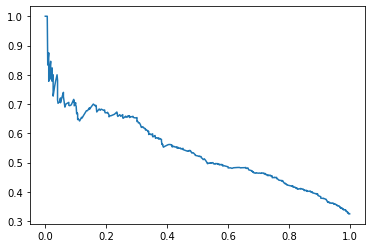

In [30]:
plt.plot(re, pr)

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5425125500914119

### ROC

In [33]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [34]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [35]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.8669270507354954)
(0.0, 0.001610305958132045, 0.8669270507354955)
(0.0, 0.00644122383252818, 0.8024330917798399)
(0.0007757951900698216, 0.008051529790660225, 0.8017121080974728)
(0.0007757951900698216, 0.011272141706924315, 0.8003464995871657)
(0.0015515903801396431, 0.011272141706924315, 0.7823195149325247)
(0.0015515903801396431, 0.017713365539452495, 0.7588344518207292)
(0.0023273855702094647, 0.017713365539452495, 0.7563066907136196)
(0.0023273855702094647, 0.01932367149758454, 0.7548205732373595)
(0.0023273855702094647, 0.02254428341384863, 0.7511892216313564)
(0.0031031807602792862, 0.02254428341384863, 0.7498651317192531)
(0.0031031807602792862, 0.02576489533011272, 0.7487829412728836)
(0.004654771140418929, 0.02576489533011272, 0.7468719146903487)
(0.004654771140418929, 0.027375201288244767, 0.7446580618470646)
(0.004654771140418929, 0.030595813204508857, 0.7410540660678425)
(0.004654771140418929, 0.03864734299516908, 0.7342544704979863)
(0.005430566330488751, 0.0

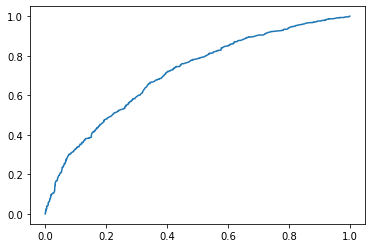

In [36]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [37]:
Xshort = data.loc[ : , ['age', 'children']]

Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [38]:
model2 = LogisticRegression(solver='lbfgs')

In [39]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [40]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
predictions2 = model2.predict_proba( X_test_short )

In [42]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

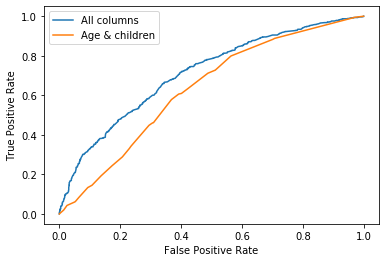

In [43]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [44]:
from sklearn.metrics import roc_auc_score

In [70]:
best_roc_auc=roc_auc_score( Y_test, predictions[:, 1] )
best_roc_auc

0.713705287885895

In [46]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [47]:
from sklearn.metrics import auc

In [48]:
auc( fpr, tpr )

0.7113660866317122

In [49]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [50]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

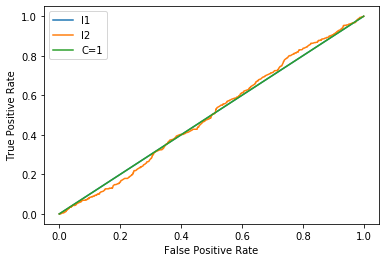

In [54]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [55]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [56]:
Y = data['affair']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [58]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [60]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

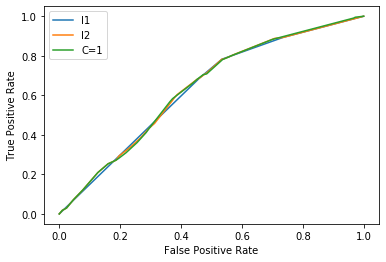

In [61]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Получите значения AUC для различных моделей и их параметров.
Попробуйте построить модель с улучшенным значением AUC, чем в примерах на занятии.**

In [71]:
print(best_roc_auc)

0.713705287885895


In [96]:
X4 = pd.get_dummies(data[['rate_marriage','educ','occupation','occupation_husb','religious', 'age', 'yrs_married']], columns = ['rate_marriage','educ','occupation','occupation_husb','religious','age', 'yrs_married'])
X4.head()

,rate_marriage_1.0,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,educ_9.0,educ_12.0,educ_14.0,educ_16.0,educ_17.0,...,age_32.0,age_37.0,age_42.0,yrs_married_0.5,yrs_married_2.5,yrs_married_6.0,yrs_married_9.0,yrs_married_13.0,yrs_married_16.5,yrs_married_23.0
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [97]:
model4=LogisticRegression(solver='lbfgs')
X_train, X_test, Y_train, Y_test = train_test_split( X4, Y, test_size = 0.3, random_state = 0 )
model4.fit(X_train, Y_train)
predictions = model4.predict_proba( X_test )

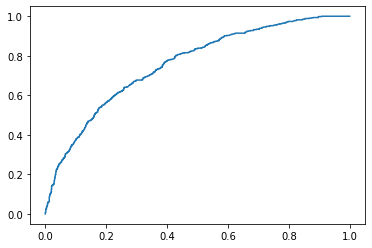

In [98]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
plt.plot( fpr, tpr, label = 'l1')

In [100]:
print (roc_auc_score( Y_test, predictions[:, 1] ), '>', best_roc_auc)

0.7574593417041651 > 0.713705287885895
